In [3]:
# SVC 분류
# import

import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score


In [4]:
# 대이터 로딩, train. test set 나누기
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [5]:
# feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# 모델 생성 및 학습
# : c값 변경하면서 성능 확인
c_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
train_acc_list = []
test_acc_list = []

for c in c_list:
    # 모델생성
    svc = SVC(kernel='linear', C=c, random_state=0)
    svc.fit(X_train_scaled, y_train)
    
    train_pred = svc.predict(X_train_scaled)
    test_pred = svc.predict(X_test_scaled)
    
    train_acc_list.append(accuracy_score(y_train, train_pred))
    test_acc_list.append(accuracy_score(y_test, test_pred))

In [19]:
# 결과확인
result = pd.DataFrame({
    "train": train_acc_list, 
    "test": test_acc_list, 
     }, index=c_list)     # c_list를 인덱스로!!
    
result.rename_axis('C', axis=0, inplace=True)  #1번 방향 axis 이름 지정.(C, train, test)
result

,train,test
C,,
0.0001,0.643192,0.643357
0.0010,0.936620,0.944056
0.0100,0.978873,0.965035
0.1000,0.990610,0.958042
1.0000,0.990610,0.965035
10.0000,0.992958,0.958042
100.0000,1.000000,0.916084


<AxesSubplot:xlabel='C'>

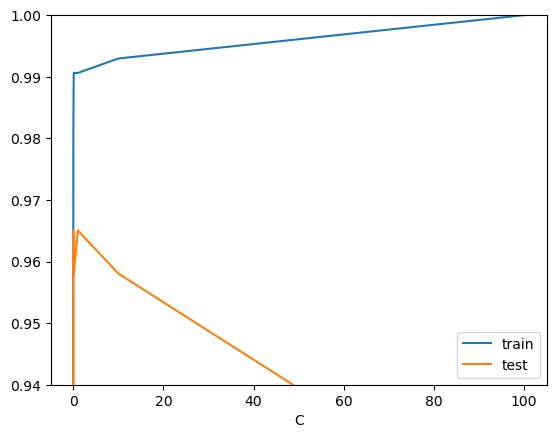

In [30]:
import matplotlib.pyplot as plt
result.plot(ylim = (0.94, 1.0))

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
[-4. -3. -2. -1.  0.  1.  2.]


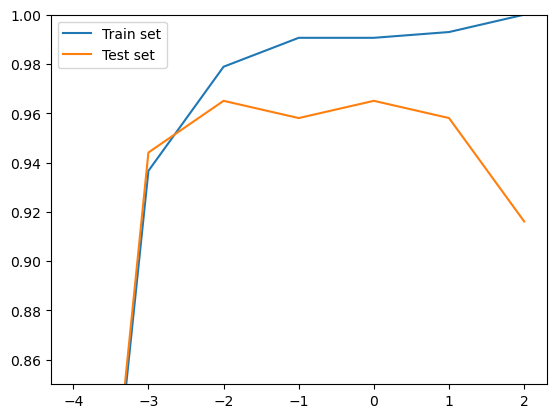

In [34]:
c = np.log10(np.array(c_list))
print(c_list)
print(c)

plt.plot(c, result['train'], label = 'Train set')
plt.plot(c, result['test'], label = 'Test set')
plt.legend()
plt.ylim(0.85, 1.0)
plt.show()

In [ ]:
#========================================================

In [39]:
# Kernal SVC
gamma_list =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
train_acc_list = []
test_acc_list = []

for gamma in gamma_list:
    svc =  SVC(kernel='rbf', C=1, gamma=gamma,random_state=0)
    svc.fit(X_train_scaled, y_train)
    
    train_pred = svc.predict(X_train_scaled)
    test_pred  = svc.predict(X_test_scaled)
    
    train_acc_list.append(accuracy_score(y_train,train_pred))
    test_acc_list.append(accuracy_score(y_test, test_pred))

In [40]:
result2 = pd.DataFrame({
    "train": train_acc_list, 
    "test": test_acc_list}, index=gamma_list)
result2.rename_axis('gamma', axis=0, inplace=True)

In [42]:
result2

,train,test
gamma,,
0.0001,0.791080,0.797203
0.0010,0.950704,0.958042
0.0100,0.985915,0.958042
0.1000,0.995305,0.923077
1.0000,1.000000,0.636364
10.0000,1.000000,0.629371
100.0000,1.000000,0.629371


In [48]:
# ROC AUC score, AP score
c = SVC(C=1.0, gamma= 0.001, random_state=0,
        probability=True)
c.fit(X_train_scaled, y_train)


SVC(gamma=0.001, probability=True, random_state=0)

In [62]:
test_proba = svc.predict_proba(X_test_scaled)[:, 1]

AttributeError: predict_proba is not available when  probability=False

In [63]:
from sklearn.metrics import roc_auc_score, average_precision_score
print(roc_auc_score(y_test, test_proba))
print(average_precision_score(y_test, test_proba))

ValueError: y should be a 1d array, got an array of shape (143, 2) instead.

In [ ]:
==============================================

In [ ]:
# GridSearch로 최적의 조합찾기

In [52]:
from sklearn.pipeline import Pipeline
order = [
    ('scaler', StandardScaler()), 
    ('svc', SVC(random_state=0,probability=True))
    
]
pipeline = Pipeline(order, verbose=True)

In [53]:
params = {
    "svc__kernel": ['linear', 'rbf', 'poly'],
    "svc__C": [0.0001, 0.001, 0.01, 0.1, 1, 10],
    "svc__gamma": [0.0001, 0.001, 0.01, 0.1, 1, 10]   
}

gs= GridSearchCV(pipeline, 
                param_grid=params,
                scoring=['accuracy', 'roc_auc'],
                refit = 'accuracy', 
                 cv=4, 
                 n_jobs=-1)

gs.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   0.0s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc',
                                        SVC(probability=True, random_state=0))],
                                verbose=True),
             n_jobs=-1,
             param_grid={'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             refit='accuracy', scoring=['accuracy', 'roc_auc'])

In [54]:
gs.best_params_

{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

In [55]:
gs.best_score_
# 0.985959266443308

0.9812643272791395

In [56]:
result = pd.DataFrame(gs.cv_results_)
result.sort_values('rank_test_accuracy').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,params,split0_test_accuracy,split1_test_accuracy,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
97,0.013878,0.005841,0.002123,0.000257,10,0.01,rbf,"{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kerne...",0.971963,0.971963,...,0.981264,0.009302,1,0.993657,0.987687,1.0,0.999621,0.995241,0.005035,4
75,0.006889,0.001309,0.001153,0.000042,1,0.001,linear,"{'svc__C': 1, 'svc__gamma': 0.001, 'svc__kerne...",0.981308,0.971963,...,0.981242,0.006578,2,0.986940,0.982463,1.0,0.997348,0.991688,0.007225,23
72,0.007160,0.002881,0.001150,0.000050,1,0.0001,linear,"{'svc__C': 1, 'svc__gamma': 0.0001, 'svc__kern...",0.981308,0.971963,...,0.981242,0.006578,2,0.986940,0.982463,1.0,0.997348,0.991688,0.007225,23
81,0.005906,0.000436,0.001639,0.000902,1,0.1,linear,"{'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel'...",0.981308,0.971963,...,0.981242,0.006578,2,0.986940,0.982463,1.0,0.997348,0.991688,0.007225,23
84,0.007698,0.001842,0.001218,0.000023,1,1,linear,"{'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': ...",0.981308,0.971963,...,0.981242,0.006578,2,0.986940,0.982463,1.0,0.997348,0.991688,0.007225,23


In [57]:
result.sort_values('rank_test_roc_auc').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,params,split0_test_accuracy,split1_test_accuracy,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
65,0.013562,0.006871,0.002817,0.001784,0.1,0.1,poly,"{'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kerne...",0.859813,0.943925,...,0.922633,0.036270,53,0.998507,0.988433,1.0,0.998864,0.996451,0.004662,1
14,0.011791,0.004695,0.003046,0.002219,0.0001,1,poly,"{'svc__C': 0.0001, 'svc__gamma': 1, 'svc__kern...",0.859813,0.943925,...,0.922633,0.036270,53,0.998134,0.988433,1.0,0.998864,0.996358,0.004623,2
94,0.012528,0.004493,0.003742,0.002045,10,0.001,rbf,"{'svc__C': 10, 'svc__gamma': 0.001, 'svc__kern...",0.953271,0.962617,...,0.971896,0.014721,14,0.997015,0.985448,1.0,1.000000,0.995616,0.005996,3
97,0.013878,0.005841,0.002123,0.000257,10,0.01,rbf,"{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kerne...",0.971963,0.971963,...,0.981264,0.009302,1,0.993657,0.987687,1.0,0.999621,0.995241,0.005035,4
79,0.013069,0.000484,0.002919,0.000124,1,0.01,rbf,"{'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel...",0.934579,0.962617,...,0.964865,0.020184,16,0.994030,0.986194,1.0,0.998864,0.994772,0.005436,5


In [58]:
# 최종 테스트
best_svc = gs.best_estimator_
test_pred = best_svc.predict(X_test)
test_proba = best_svc.predict_proba(X_test)

In [59]:
accuracy_score(y_test, test_pred)

0.972027972027972

In [64]:
roc_auc_score(y_test, test_proba[:, 1])

0.9953878406708596